# Merging datasets and adding Henry's Law Constants and Melting Points

In [1]:
# importing modules that will be used

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
# load aqsoldb csv file as a pandas dataframe
aqsoldb = pd.read_csv('aqsoldb.csv')

# load s and kh csv file as a pandas dataframe
s_and_kh = pd.read_csv('S_and_KH_data.csv')

In [3]:
# inspect dataframes
aqsoldb.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


In [4]:
# inspect dataframes
s_and_kh.head()

,InChI_Key,species,SLN,SMILES,LogS,LogKH,MW,MLOGP
0,AAEVYOVXGOFMJO-UHFFFAOYSA-N,Prometryn,S(CH3)C[6]=NC(=NC(=N@6)NHCH(CH3)CH3)NHCH(CH3)CH3,CSc1nc(NC(C)C)nc(NC(C)C)n1,-4.10,-6.709304,241.41,2.893
1,AEXMKKGTQYQZCS-UHFFFAOYSA-N,"3,3-Dimethylpentane",C(CH2CH3)(CH2CH3)(CH3)CH3,CCC(C)(C)CC,-4.23,12.129112,100.23,3.869
2,AFABGHUZZDYHJO-UHFFFAOYSA-N,2-Methylpentane,CH3CH(CH2CH2CH3)CH3,CCCC(C)C,-3.74,12.040558,86.20,3.516
3,AFBPFSWMIHJQDM-UHFFFAOYSA-N,N-Methylaniline,NH(CH3)C[7]=CHCH=CHCH=CH@7,CNc1ccccc1,-1.28,0.139262,107.17,1.859
4,AFFLGGQVNFXPEV-UHFFFAOYSA-N,1-Decene,CH2(CH2CH2CH2CH3)CH2CH2CH2CH=CH2,C=CCCCCCCCC,-5.51,12.507178,140.30,4.678


In [5]:
# how many common species are there?
aqsoldb['match'] = aqsoldb['InChIKey'].isin(s_and_kh.InChI_Key)

aqsoldb[aqsoldb['match'] == True]

# there are 877 species that appear in both datasets

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,match
16,A-24,2-(4-chloro-2-methylphenoxy)propanoic acid,InChI=1S/C10H11ClO3/c1-6-5-8(11)3-4-9(6)14-7(2...,WNTGYJSOUMFZEP-UHFFFAOYSA-N,CC(Oc1ccc(Cl)cc1C)C(O)=O,-2.466031,0.060621,4,G5,214.648,...,76.0,1.0,0.0,0.0,1.0,46.53,87.263739,2.817665,349.220389,True
50,A-73,S-ethyl dipropylthiocarbamate,InChI=1S/C9H19NOS/c1-4-7-10(8-5-2)9(11)12-6-3/...,GUVLYNGULCJVDO-UHFFFAOYSA-N,CCCN(CCC)C(=O)SCC,-2.703174,0.018736,2,G3,189.324,...,72.0,0.0,0.0,0.0,0.0,20.31,79.703254,3.810795,121.696943,True
86,A-141,2H-chromen-2-one,InChI=1S/C9H6O2/c10-9-6-5-7-3-1-2-4-8(7)11-9/h...,ZYGHJZDHTFUPRJ-UHFFFAOYSA-N,O=C1Oc2ccccc2C=C1,-1.886030,0.640507,3,G4,146.145,...,54.0,2.0,0.0,0.0,2.0,30.21,63.079407,2.935351,428.510821,True
87,A-142,1-methyl-4-(prop-1-en-2-yl)cyclohex-1-ene,"InChI=1S/C10H16/c1-8(2)10-6-4-9(3)5-7-10/h4,10...",XMGQYMWWDOXHJM-UHFFFAOYSA-N,CC(=C)C1CCC(=CC1)C,-3.846497,0.730589,9,G4,136.238,...,56.0,0.0,0.0,1.0,1.0,0.00,63.638693,2.495412,162.877124,True
105,A-176,"1,2-dibutyl benzene-1,2-dicarboxylate",InChI=1S/C16H22O4/c1-3-5-11-19-15(17)13-9-7-8-...,DOIRQSBPFJWKBE-UHFFFAOYSA-N,CCCCOC(=O)c1ccccc1C(=O)OCCCC,-4.387683,0.057297,5,G5,278.348,...,110.0,1.0,0.0,0.0,1.0,52.60,119.630959,2.712391,398.857942,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9923,H-517,"2,2',3,3',4,4',5,5',6'-Nonachlorodiphenyl ether",InChI=1S/C12HCl9O/c13-2-1-3(5(15)6(16)4(2)14)2...,FPEYJPVHPGDXDD-UHFFFAOYSA-N,ClC1=C(Cl)C(Cl)=C(Cl)C(OC2=C(Cl)C(Cl)=C(Cl)C(C...,-10.550000,0.475000,2,G3,480.216,...,118.0,2.0,0.0,0.0,2.0,9.23,170.331439,2.628173,743.162965,True
9925,H-524,Alachlor,InChI=1S/C14H20ClNO2/c1-4-11-7-6-8-12(5-2)14(1...,XCSGPAVHZFQHGE-UHFFFAOYSA-N,CCC1=CC=CC(CC)=C1N(COC)C(=O)CCl,-3.170000,0.085682,3,G5,269.772,...,100.0,1.0,0.0,0.0,1.0,29.54,113.689107,3.276613,384.530507,True
9927,H-530,Carbophenothion,"InChI=1S/C11H16ClO2PS3/c1-3-13-15(16,14-4-2)18...",VEDTXTNSFWUXGQ-UHFFFAOYSA-N,CCOP(=S)(OCC)SCSC1=CC=C(Cl)C=C1,-6.050000,0.157100,2,G3,342.875,...,102.0,1.0,0.0,0.0,1.0,18.46,127.074533,2.431479,389.779728,True
9931,H-556,b-Endosulfan,InChI=1S/C9H6Cl6O3S/c10-5-6(11)8(13)4-2-18-19(...,RDYMFSUJUZBWLH-UHFFFAOYSA-N,O=S1OCC2C(CO1)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,-6.080000,0.090204,4,G5,406.929,...,108.0,0.0,2.0,3.0,3.0,35.53,141.790641,2.187726,470.183414,True


### Merging Datasets

In [6]:
# adding LogKH where InChIKeys match up
aqsoldb = aqsoldb.assign(LogKH=aqsoldb['InChIKey'].map(s_and_kh.set_index('InChI_Key')['LogKH']))

In [7]:
# adding MLOGP where InChIKeys match up
aqsoldb = aqsoldb.assign(MLOGP=aqsoldb['InChIKey'].map(s_and_kh.set_index('InChI_Key')['MLOGP']))

In [8]:
# adding LogS where InChIKeys match up
aqsoldb = aqsoldb.assign(LogS=aqsoldb['InChIKey'].map(s_and_kh.set_index('InChI_Key')['LogS']))

In [9]:
aqsoldb.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,match,LogKH,MLOGP,LogS
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334,False,NaN,NaN,NaN
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248,False,NaN,NaN,NaN
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065,False,NaN,NaN,NaN
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666,False,NaN,NaN,NaN
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934,False,NaN,NaN,NaN


In [10]:
aqsoldb[aqsoldb['LogKH'].notnull()]

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,match,LogKH,MLOGP,LogS
16,A-24,2-(4-chloro-2-methylphenoxy)propanoic acid,InChI=1S/C10H11ClO3/c1-6-5-8(11)3-4-9(6)14-7(2...,WNTGYJSOUMFZEP-UHFFFAOYSA-N,CC(Oc1ccc(Cl)cc1C)C(O)=O,-2.466031,0.060621,4,G5,214.648,...,0.0,1.0,46.53,87.263739,2.817665,349.220389,True,-9.104980,2.378,-2.550
50,A-73,S-ethyl dipropylthiocarbamate,InChI=1S/C9H19NOS/c1-4-7-10(8-5-2)9(11)12-6-3/...,GUVLYNGULCJVDO-UHFFFAOYSA-N,CCCN(CCC)C(=O)SCC,-2.703174,0.018736,2,G3,189.324,...,0.0,0.0,20.31,79.703254,3.810795,121.696943,True,0.579818,1.971,-2.700
86,A-141,2H-chromen-2-one,InChI=1S/C9H6O2/c10-9-6-5-7-3-1-2-4-8(7)11-9/h...,ZYGHJZDHTFUPRJ-UHFFFAOYSA-N,O=C1Oc2ccccc2C=C1,-1.886030,0.640507,3,G4,146.145,...,0.0,2.0,30.21,63.079407,2.935351,428.510821,True,-4.605170,2.265,-1.810
87,A-142,1-methyl-4-(prop-1-en-2-yl)cyclohex-1-ene,"InChI=1S/C10H16/c1-8(2)10-6-4-9(3)5-7-10/h4,10...",XMGQYMWWDOXHJM-UHFFFAOYSA-N,CC(=C)C1CCC(=CC1)C,-3.846497,0.730589,9,G4,136.238,...,1.0,1.0,0.00,63.638693,2.495412,162.877124,True,7.641724,3.267,-4.000
105,A-176,"1,2-dibutyl benzene-1,2-dicarboxylate",InChI=1S/C16H22O4/c1-3-5-11-19-15(17)13-9-7-8-...,DOIRQSBPFJWKBE-UHFFFAOYSA-N,CCCCOC(=O)c1ccccc1C(=O)OCCCC,-4.387683,0.057297,5,G5,278.348,...,0.0,1.0,52.60,119.630959,2.712391,398.857942,True,-2.230014,3.618,-4.340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9923,H-517,"2,2',3,3',4,4',5,5',6'-Nonachlorodiphenyl ether",InChI=1S/C12HCl9O/c13-2-1-3(5(15)6(16)4(2)14)2...,FPEYJPVHPGDXDD-UHFFFAOYSA-N,ClC1=C(Cl)C(Cl)=C(Cl)C(OC2=C(Cl)C(Cl)=C(Cl)C(C...,-10.550000,0.475000,2,G3,480.216,...,0.0,2.0,9.23,170.331439,2.628173,743.162965,True,7.581100,6.136,-10.550
9925,H-524,Alachlor,InChI=1S/C14H20ClNO2/c1-4-11-7-6-8-12(5-2)14(1...,XCSGPAVHZFQHGE-UHFFFAOYSA-N,CCC1=CC=CC(CC)=C1N(COC)C(=O)CCl,-3.170000,0.085682,3,G5,269.772,...,0.0,1.0,29.54,113.689107,3.276613,384.530507,True,-6.507278,3.182,-3.159
9927,H-530,Carbophenothion,"InChI=1S/C11H16ClO2PS3/c1-3-13-15(16,14-4-2)18...",VEDTXTNSFWUXGQ-UHFFFAOYSA-N,CCOP(=S)(OCC)SCSC1=CC=C(Cl)C=C1,-6.050000,0.157100,2,G3,342.875,...,0.0,1.0,18.46,127.074533,2.431479,389.779728,True,-3.891820,3.089,-5.895
9931,H-556,b-Endosulfan,InChI=1S/C9H6Cl6O3S/c10-5-6(11)8(13)4-2-18-19(...,RDYMFSUJUZBWLH-UHFFFAOYSA-N,O=S1OCC2C(CO1)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,-6.080000,0.090204,4,G5,406.929,...,3.0,3.0,35.53,141.790641,2.187726,470.183414,True,0.061875,3.115,-6.005


The Solubility values are very closely matched but are not exactly the same

In [11]:
# loading henry's law dataset into pandas dataframe
henry_db = pd.read_csv('hcp_values.csv')

In [12]:
henry_db

,Species,InChIKey,Hcp
0,oxygen,MYMOFIZGZYHOMD-UHFFFAOYSA-N,0.000012
1,ozone,CBENFWSGALASAD-UHFFFAOYSA-N,0.000100
2,hydrogen atom,YZCKVEUIGOORGS-UHFFFAOYSA-N,0.000003
3,hydrogen,UFHFLCQGNIYNRP-UHFFFAOYSA-N,0.000008
4,deuterium,UFHFLCQGNIYNRP-VVKOMZTBSA-N,0.000008
...,...,...,...
4627,tetramethyl lead,XOOGZRUBTYCLHG-UHFFFAOYSA-N,0.000016
4628,ethyltrimethylplumbane,KHQJREYATBQBHY-UHFFFAOYSA-N,0.000028
4629,diethyldimethylplumbane,OLOAJSHVLXNSQV-UHFFFAOYSA-N,0.000021
4630,triethylmethylplumbane,KGFRUGHBHNUHOS-UHFFFAOYSA-N,0.000016


In [13]:
# adding Hcp where InChIKeys match up
aqsoldb = aqsoldb.join(henry_db.set_index('InChIKey'), on='InChIKey')

In [14]:
aqsoldb

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,TPSA,LabuteASA,BalabanJ,BertzCT,match,LogKH,MLOGP,LogS,Species,Hcp
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.000000,1,G1,392.510,...,0.00,158.520601,0.000000e+00,210.377334,False,NaN,NaN,NaN,NaN,NaN
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.000000,1,G1,169.183,...,29.10,75.183563,2.582996e+00,511.229248,False,NaN,NaN,NaN,NaN,NaN
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.000000,1,G1,140.569,...,17.07,58.261134,3.009782e+00,202.661065,False,NaN,NaN,NaN,NaN,NaN
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.000000,1,G1,756.226,...,120.72,323.755434,2.322963e-07,1964.648666,False,NaN,NaN,NaN,NaN,NaN
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.000000,1,G1,422.525,...,56.60,183.183268,1.084427e+00,769.899934,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,I-84,tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000,0.000000,1,G1,264.369,...,41.57,115.300645,2.394548e+00,374.236893,False,NaN,NaN,NaN,NaN,NaN
9978,I-85,tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000,0.000000,1,G1,444.440,...,181.62,182.429237,2.047922e+00,1148.584975,False,NaN,NaN,NaN,NaN,NaN
9979,I-86,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.190000,0.019222,3,G5,150.221,...,20.23,67.685405,3.092720e+00,251.049732,False,NaN,NaN,NaN,5-methyl-2-(1-methylethyl)-phenol,3.0
9980,I-93,verapamil,"InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...",SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.980000,0.000000,1,G1,454.611,...,63.95,198.569223,2.023333e+00,938.203977,False,NaN,NaN,NaN,NaN,NaN


In [15]:
# how many have matched?
matched = aqsoldb[aqsoldb['Hcp'].notnull()]
matched
# 2399 have a match

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,TPSA,LabuteASA,BalabanJ,BertzCT,match,LogKH,MLOGP,LogS,Species,Hcp
5,A-10,vinyltoluene,"InChI=1S/C9H10/c1-3-9-6-4-5-8(2)7-9/h3-7H,1H2,2H3",JZHGRUMIRATHIU-UHFFFAOYSA-N,Cc1cccc(C=C)c1,-3.123150,0.000000,1,G1,118.179,...,0.00,55.836626,3.070761,211.033225,False,NaN,NaN,NaN,1-ethenyl-3-methylbenzene,3.100000e-03
16,A-24,2-(4-chloro-2-methylphenoxy)propanoic acid,InChI=1S/C10H11ClO3/c1-6-5-8(11)3-4-9(6)14-7(2...,WNTGYJSOUMFZEP-UHFFFAOYSA-N,CC(Oc1ccc(Cl)cc1C)C(O)=O,-2.466031,0.060621,4,G5,214.648,...,46.53,87.263739,2.817665,349.220389,True,-9.10498,2.378,-2.55,mecoprop,9.000000e+03
18,A-26,1-chloro-3-(trifluoromethyl)benzene,"InChI=1S/C7H4ClF3/c8-6-3-1-2-5(4-6)7(9,10)11/h...",YTCGOUNVIAWCMG-UHFFFAOYSA-N,FC(F)(F)c1cccc(Cl)c1,-3.411514,0.000000,1,G1,180.556,...,0.00,66.596218,3.059902,254.107753,False,NaN,NaN,NaN,1-chloro-3-(trifluoromethyl)benzene,2.900000e-04
21,A-29,1-methyl-4-(propan-2-ylidene)cyclohex-1-ene,"InChI=1S/C10H16/c1-8(2)10-6-4-9(3)5-7-10/h4H,5...",MOYAFQVGZZPNRA-UHFFFAOYSA-N,CC(C)=C1CCC(=CC1)C,-4.287343,0.131231,3,G5,136.238,...,0.00,63.638693,2.668730,178.214991,False,NaN,NaN,NaN,1-methyl-4-(1-methylethylidene)-cyclohexene,3.800000e-04
27,A-36,"(1S,5S)-6,6-dimethyl-2-methylidenebicyclo[3.1....","InChI=1S/C10H16/c1-7-4-5-8-6-9(7)10(8,2)3/h8-9...",WTARULDDTDQWMU-UHFFFAOYSA-N,CC1(C)C2CCC(=C)C1C2,-4.292313,1.247787,3,G4,136.238,...,0.00,63.322465,2.231081,174.477332,False,NaN,NaN,NaN,$\beta$-pinene,1.600000e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,I-63,papaverine,InChI=1S/C20H21NO4/c1-22-17-6-5-13(10-18(17)23...,XQYZDYMELSJDRZ-UHFFFAOYSA-N,c1(nccc2cc(c(OC)cc12)OC)Cc1cc(c(cc1)OC)OC,-3.870000,0.790000,2,G2,339.391,...,49.81,146.668701,2.039871,892.243703,False,NaN,NaN,NaN,papaverine,1.300000e+07
9967,I-66,phenobarbital,InChI=1S/C12H12N2O3/c1-2-12(8-6-4-3-5-7-8)9(15...,DDBREPKUVSBGFI-UHFFFAOYSA-N,C1(NC(C(c2ccccc2)(C(=O)N1)CC)=O)=O,-2.290000,0.095670,5,G5,232.239,...,75.27,98.199515,2.535973,461.783925,False,NaN,NaN,NaN,phenobarbital,5.800000e+08
9974,I-79,sulfamethazine,InChI=1S/C12H14N4O2S/c1-8-7-9(2)15-12(14-8)16-...,ASWVTGNCAZCNNR-UHFFFAOYSA-N,S(=O)(=O)(Nc1nc(C)cc(n1)C)c1ccc(N)cc1,-2.730000,0.230750,2,G3,278.337,...,97.97,111.308206,2.330509,675.919365,False,NaN,NaN,NaN,sulfamethazine,3.200000e+07
9979,I-86,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.190000,0.019222,3,G5,150.221,...,20.23,67.685405,3.092720,251.049732,False,NaN,NaN,NaN,5-methyl-2-(1-methylethyl)-phenol,3.000000e+00


(0.0, 1.0)

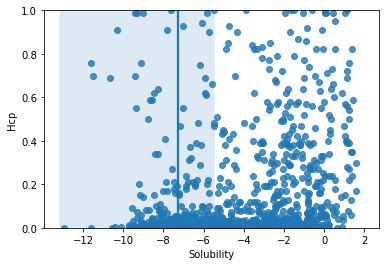

In [58]:
# plotting solubility values vs Hcp values
sns.regplot(data=matched, x='Solubility', y='Hcp')
plt.ylim(0, 1)

### Calculating Aromatic Proportion Descriptor

In [59]:
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [60]:
# adding a Mol column into the dataframe which can be utilised by rdkit
PandasTools.AddMoleculeColumnToFrame(aqsoldb, 'SMILES', 'Mol')

In [61]:
# calculate number of aromatic atoms
aqsoldb['NumAromaticAtoms'] = [sum(row.GetAtomWithIdx(i).GetIsAromatic() for i in range(row.GetNumAtoms())) for row in aqsoldb['Mol']]

In [62]:
aqsoldb['NumAromaticAtoms']

0        0
1       10
2        6
3       36
4       12
        ..
9977     6
9978     6
9979     6
9980    12
9981    16
Name: NumAromaticAtoms, Length: 9982, dtype: int64

In [63]:
# calculating aromatic proportion (AP) descriptor
def AP(df):
    return df['NumAromaticAtoms'] / df['HeavyAtomCount']

aqsoldb['AP'] = aqsoldb.apply(AP, axis=1)

In [64]:
aqsoldb.dtypes

ID                      object
Name                    object
InChI                   object
InChIKey                object
SMILES                  object
Solubility             float64
SD                     float64
Ocurrences               int64
Group                   object
MolWt                  float64
MolLogP                float64
MolMR                  float64
HeavyAtomCount         float64
NumHAcceptors          float64
NumHDonors             float64
NumHeteroatoms         float64
NumRotatableBonds      float64
NumValenceElectrons    float64
NumAromaticRings       float64
NumSaturatedRings      float64
NumAliphaticRings      float64
RingCount              float64
TPSA                   float64
LabuteASA              float64
BalabanJ               float64
BertzCT                float64
match                     bool
LogKH                  float64
MLOGP                  float64
LogS                   float64
Species                 object
Hcp                    float64
Mol     

In [65]:
aqsoldb.to_csv('curated_aqsoldb.csv', index=False)

#### EDA

Text(0.5, 1.0, 'The effect of aromatic proportion on solubility')

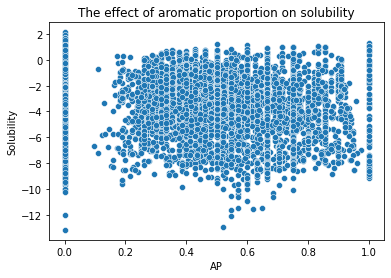

In [66]:
# Solubility vs AP
sns.scatterplot(data=aqsoldb, x='AP', y='Solubility').set_title('The effect of aromatic proportion on solubility')

There really isn't any correlation here.

Text(0.5, 1.0, 'The effect of number of rotatable bonds on solubility')

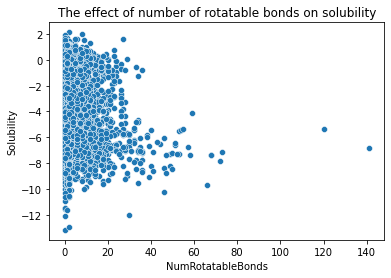

In [67]:
# Solubility vs NumRotatableBonds
sns.scatterplot(data=aqsoldb, x='NumRotatableBonds', y='Solubility').set_title('The effect of number of rotatable bonds on solubility')

No real correlation here either.

Text(0.5, 1.0, 'The effect of number of MLogP on solubility')

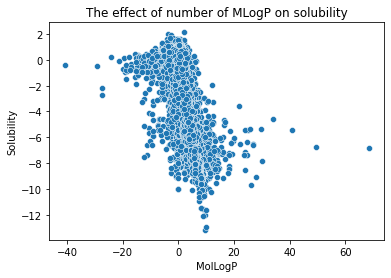

In [68]:
# Solubility vs MLogP
sns.scatterplot(data=aqsoldb, x='MolLogP', y='Solubility').set_title('The effect of number of MLogP on solubility')

somewhat negative correlation

### Adding Melting Point Data

In [69]:
mps = pd.read_csv('mp_celsius.csv')

In [70]:
# adding melting points where InChIKeys match up
aqsoldb = aqsoldb.join(mps.set_index('InChIKey'), on='InChIKey')

In [71]:
aqsoldb['Melting Point']

0         NaN
1       175.5
2        47.5
3         NaN
4         NaN
        ...  
9977      NaN
9978      NaN
9979     51.5
9980      NaN
9981    161.0
Name: Melting Point, Length: 10063, dtype: float64

There are 3571 compounds which have a melting point.

In [72]:
aqsoldb.to_csv('curated_aqsoldb.csv', index=False)

### Predicting Melting Point using General Solubility Equation

The General Solubility Equation (GSE) is log S = 0.5 - (0.01 * melting point (in celsius) - 25) - log P

In [76]:
def gse(df):
    log_S = 0.5 - 0.01 * (df['Melting Point'] - 25) - df['MolLogP']
    df['GSE LogS'] = log_S
    return df

aqsoldb = aqsoldb.apply(gse, axis=1)

[Text(0.5, 1.0, 'Solubility prediction using GSE'),
 Text(0.5, 0, 'experimental LogS'),
 Text(0, 0.5, 'predicted LogS')]

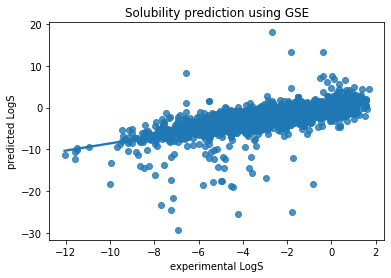

In [83]:
# plot results
sns.regplot(data=aqsoldb, x='Solubility', y='GSE LogS').set(title='Solubility prediction using GSE', xlabel='experimental LogS', ylabel='predicted LogS')